In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import pdb

%matplotlib inline

# Загружаем выборку Diamonds

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds_df = pd.read_csv('diamonds.csv')

In [3]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


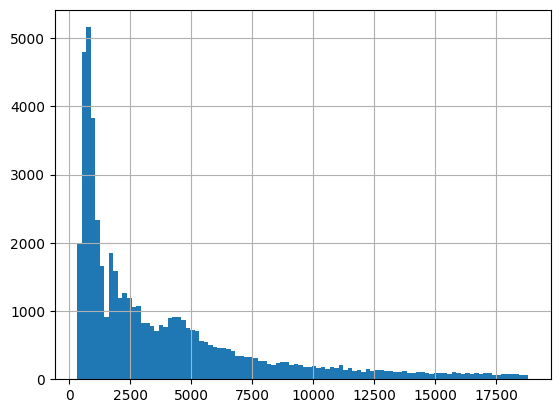

In [4]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [5]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [6]:
print([1,2])

[1, 2]


In [7]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [8]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [9]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,4,1,1,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,1,63.3,58.0,335,4.34,4.35,2.75


In [10]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

# Обучаем модель линейной регрессии

In [13]:
reg = LinearRegression().fit(X_train, y_train)

In [14]:
y_pred = reg.predict(X_test)

In [15]:
score = r2_score(y_pred, y_test)

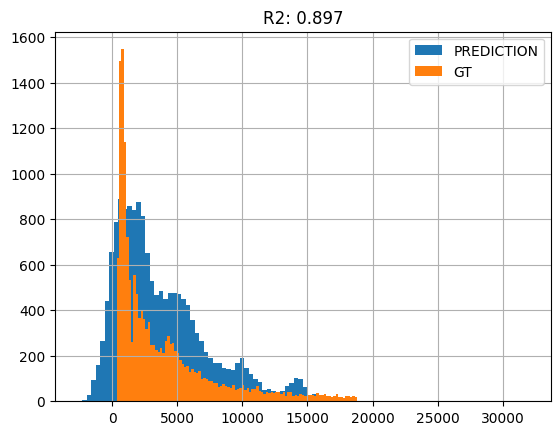

In [16]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

# Создаём модель MLP для задачи регрессии

In [17]:
class SigmoidLayer:
    def __init__(self) -> None:
        pass
    def forward(self,X):
        self.y = 1/(1 + np.exp(-X))
        return self.y
    def backward(self,dLdy):
        return dLdy * self.y * (1 - self.y)
    def step(self):
        pass

In [334]:
class LinearLayer:
    def __init__(self, input_size,output_size,l_r):
        self.W = np.ones((input_size,output_size)) * 0.01
        self.b = np.zeros((output_size)) * 0.01
        self.l_r = l_r
        
    
    def forward(self, X):
        self.X = X
        #print(X.shape, self.W.shape)
        self.Y = X @ self.W + self.b
        return self.Y
    
    def backward(self, dLdy):
        dydw = self.W
        #X [N,input,1]
        #dLdy [N,1,output]
        #print('before = ',self.X.shape,dLdy.shape)
        self.dLdw = self.X.T @  dLdy # Because it is 3D matrix
        #print('after = ',np.expand_dims(self.X, -1).shape,np.expand_dims(dLdy, -2).shape)
        #print('dLdw = ',self.dLdw)
        #pdb.set_trace()

        
        self.dLdb = dLdy # as dy/db == 1
          
        if len(self.dLdw.shape) > 2:
                self.dLdw = self.dLdw.sum(axis=0)
        if len(self.dLdb) > 1:
             self.dLdb = self.dLdb.sum(axis=0)
        #pdb.set_trace()
        dLdx = dLdy @ self.W.T
        #print('dLdx=',dLdx)
        return dLdx
    def step(self):
        self.W -= self.dLdw * self.l_r
        self.b -= self.dLdb * self.l_r

In [335]:
def check_gradient(f,x,eps = 1e-6):
    y = np.ones(x.shape)
    for i in range(x.shape[0]):
            if (len(x.shape) > 1):
                for j in range(x.shape[1]):
                    x[i,j] += eps
                    f_plus = f(x)
                    x[i][j] -= 2 * eps
                    f_minus = f(x)
                    x[i][j] += eps

                    y[i][j] = (f_plus - f_minus) / (2 * eps)
            else:
                    x[i] += eps
                    f_plus = f(x)
                    x[i] -= 2 * eps
                    f_minus = f(x)
                    x[i] += eps

                    y[i] = (f_plus - f_minus) / (2 * eps)
    return y

test_x = np.array([[1.2, 3.4, 5.6],[7.8,8.9,9.1]])
linearTest = LinearLayer(3,2,0.1)
linearTest.forward(test_x)
def f(W,x=test_x):
      return linearTest.forward(x).sum()
    
check_gradient(f, linearTest.W)

array([[ 9. ,  9. ],
       [12.3, 12.3],
       [14.7, 14.7]])

In [336]:

linearTest.backward(np.ones(2))
print(linearTest.dLdw)

[ 9.  12.3 14.7]


In [337]:
class MSELOSS:
    def __init__(self) -> None:
        pass
    def forward(self,y,y_res):
        self.n = y.shape[0]
        #print(y.shape,y_res.shape)
        self.diff = y - y_res
        #print(self.diff.shape)
        self.L = (self.diff ** 2).mean()
        return self.L
    def backward(self):
        dLdy =   (-1 / self.n) * (2 * self.diff)
        return dLdy


In [338]:
class R2LOSS:
    def __init__(self) -> None:
        pass
    def forward(self,y,y_res):
        self.n = y.shape[0]
        self.diff = y - y_res 
        self.L = 1 - ( y - y_res) ** 2
        return self.L
    def backward(self):
        dLdy =   (1 / self.n) * (2 * self.diff)
        return dLdy

In [339]:
class MLPRegressor:
    def __init__(
        self,
        hidden_layer_sizes=(100,100),
        learning_rate=1e-6,
        max_iter=100,
        layers = None,
        loss = None
    ):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.hidden_layer_sizes = hidden_layer_sizes
        self.layers = layers
        self.loss = loss
        if (self.layers == None):
            self.layers = []
            layer_size = hidden_layer_sizes[1]
            for i in range(hidden_layer_sizes[0]): #layersCount
                self.layers.append(LinearLayer(layer_size,layer_size,learning_rate))
                self.layers.append(SigmoidLayer())
        self.layers.append(LinearLayer(layer_size,1,learning_rate))
        if (self.loss == None):
            self.loss = MSELOSS()
    
    def train(self, X, y):
        losses = []
        saved_X = X
        for i in range(self.max_iter):
            X = saved_X
            for layer in self.layers:
                X = layer.forward(X)
                #print(f'X =={X}',X)
                
            L = self.loss.forward(X,y) # On last interation the input will be the result
            #print('L_shape=',L.shape)
            losses.append(L)
            dLdy = self.loss.backward() 
            #dLdy = L
            #print('shape.loss==',dLdy.shape)
            for layer in self.layers[::-1]:
                dLdy = layer.backward(dLdy)

            for layer in self.layers:
                layer.step()
        return losses

    def predict(self, X):
        for layer in self.layers:
                X = layer.forward(X)
        return X

In [340]:
TestMSELOSS = MSELOSS()
chosen_size = 50
test_y = np.random.rand(chosen_size,1)
test_y_res = np.random.rand(chosen_size,1)
TestMSELOSS.forward(test_y,test_y_res)
def f_loss(W,y=test_y,y_res = test_y_res):
      return TestMSELOSS.forward(y,y_res).sum()
check_gradient(f_loss, test_y_res)

array([[-7.11065104e-03],
       [-1.09046393e-02],
       [ 5.56307457e-03],
       [-1.05997884e-02],
       [-9.53355093e-03],
       [ 3.38222372e-03],
       [-2.44282942e-02],
       [-2.04790643e-02],
       [ 7.63875074e-07],
       [ 9.43422514e-03],
       [-1.55368694e-03],
       [-1.89877686e-02],
       [-1.00772758e-02],
       [-4.69532314e-03],
       [-1.02295037e-02],
       [ 1.50783643e-02],
       [ 1.59496844e-02],
       [-2.88615160e-04],
       [-1.65369395e-02],
       [-5.66259759e-03],
       [ 9.61873664e-03],
       [ 3.55237555e-02],
       [ 5.77246549e-03],
       [ 2.52112126e-02],
       [-3.40544182e-03],
       [-4.97368262e-03],
       [-9.79668166e-04],
       [-2.27577729e-02],
       [ 1.86510141e-02],
       [-5.43946055e-04],
       [ 4.84900478e-03],
       [ 2.35798020e-02],
       [ 2.00152897e-02],
       [-8.71337244e-03],
       [-1.53088030e-02],
       [ 2.36807213e-04],
       [-9.44275297e-03],
       [ 1.30570920e-02],
       [-1.9

In [341]:
test_y,test_y_res

(array([[0.58551176],
        [0.99365967],
        [0.72996017],
        [0.93365651],
        [0.3706036 ],
        [0.3982722 ],
        [0.80736855],
        [0.66698678],
        [0.33559389],
        [0.50209436],
        [0.14565585],
        [0.49451104],
        [0.76941963],
        [0.28041212],
        [0.2992189 ],
        [0.02030193],
        [0.45032716],
        [0.2502475 ],
        [0.69238939],
        [0.74408847],
        [0.28595451],
        [0.07793833],
        [0.63754502],
        [0.32283024],
        [0.51569583],
        [0.1463014 ],
        [0.62376753],
        [0.9119009 ],
        [0.532121  ],
        [0.81363251],
        [0.16727182],
        [0.25693738],
        [0.42115307],
        [0.72092021],
        [0.4166211 ],
        [0.49394184],
        [0.68115383],
        [0.5617994 ],
        [0.61658654],
        [0.53455666],
        [0.68910581],
        [0.0613962 ],
        [0.53032279],
        [0.19810686],
        [0.60812886],
        [0

In [342]:
TestMSELOSS.backward()

array([[-7.11065104e-03],
       [-1.09046393e-02],
       [ 5.56307457e-03],
       [-1.05997885e-02],
       [-9.53355094e-03],
       [ 3.38222372e-03],
       [-2.44282942e-02],
       [-2.04790643e-02],
       [ 7.63880820e-07],
       [ 9.43422514e-03],
       [-1.55368695e-03],
       [-1.89877686e-02],
       [-1.00772758e-02],
       [-4.69532314e-03],
       [-1.02295037e-02],
       [ 1.50783643e-02],
       [ 1.59496844e-02],
       [-2.88615151e-04],
       [-1.65369394e-02],
       [-5.66259760e-03],
       [ 9.61873663e-03],
       [ 3.55237555e-02],
       [ 5.77246550e-03],
       [ 2.52112126e-02],
       [-3.40544181e-03],
       [-4.97368262e-03],
       [-9.79668155e-04],
       [-2.27577729e-02],
       [ 1.86510141e-02],
       [-5.43946051e-04],
       [ 4.84900479e-03],
       [ 2.35798020e-02],
       [ 2.00152897e-02],
       [-8.71337243e-03],
       [-1.53088030e-02],
       [ 2.36807214e-04],
       [-9.44275296e-03],
       [ 1.30570920e-02],
       [-1.9

In [343]:
len(features)

9

# Проверяем модель MLP на выборке Diamonds

In [344]:
mlpRegressorTest = MLPRegressor(hidden_layer_sizes=(1,2))
a = np.array([[1.2,3.2],[3.4,5.6]])
b = np.array([1.3,2.3]).reshape(-1,1)

In [345]:
print(mlpRegressorTest.layers[0].W)
#mlpRegressorTest.layers[0].dLdw

[[0.01 0.01]
 [0.01 0.01]]


In [346]:
mlpRegressorTest.train(a,b)


[3.4527865661077355,
 3.4528062670694046,
 3.45282596814841,
 3.452845669344753,
 3.4528653706584347,
 3.4528850720894564,
 3.45290477363782,
 3.4529244753035253,
 3.4529441770865756,
 3.452963878986972,
 3.4529835810047143,
 3.453003283139805,
 3.453022985392245,
 3.4530426877620366,
 3.4530623902491797,
 3.4530820928536756,
 3.4531017955755274,
 3.4531214984147356,
 3.4531412013713,
 3.453160904445225,
 3.453180607636508,
 3.4532003109451543,
 3.4532200143711624,
 3.4532397179145353,
 3.453259421575274,
 3.453279125353378,
 3.453298829248851,
 3.453318533261694,
 3.453338237391908,
 3.4533579416394935,
 3.4533776460044523,
 3.4533973504867856,
 3.453417055086496,
 3.453436759803584,
 3.453456464638051,
 3.453476169589898,
 3.4534958746591253,
 3.453515579845737,
 3.453535285149732,
 3.4535549905711127,
 3.4535746961098805,
 3.4535944017660363,
 3.453614107539581,
 3.4536338134305176,
 3.4536535194388467,
 3.4536732255645686,
 3.4536929318076854,
 3.453712638168198,
 3.453732344646108

In [356]:
mlpRegressor = MLPRegressor(hidden_layer_sizes=(50,len(features)),learning_rate=1e-4)

In [357]:
print(X_train)

[[0.05197505 0.75       0.83333333 ... 0.45623836 0.08285229 0.09685535]
 [0.31185031 1.         0.33333333 ... 0.7122905  0.12852292 0.14937107]
 [0.07068607 1.         0.16666667 ... 0.49068901 0.08981324 0.10062893]
 ...
 [0.07276507 0.5        0.33333333 ... 0.49255121 0.09032258 0.10125786]
 [0.07068607 1.         0.33333333 ... 0.49068901 0.08913413 0.10125786]
 [0.03950104 0.75       0.5        ... 0.44134078 0.07962649 0.09025157]]


In [358]:
losses_mlp = mlpRegressor.train(X_train,y_train)

In [359]:
y_pred_mlp = mlpRegressor.predict(X_test)


In [360]:
score_mlp = r2_score(y_pred_mlp, y_test)

In [361]:
print(y_pred_mlp)

[[-855.90546184]
 [-855.90546184]
 [-855.90546184]
 ...
 [-855.90546184]
 [-855.90546184]
 [-855.90546184]]


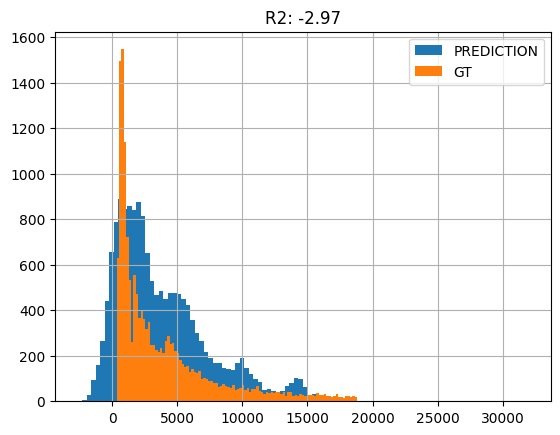

In [362]:
plt.title(f'R2: {str(score_mlp)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()

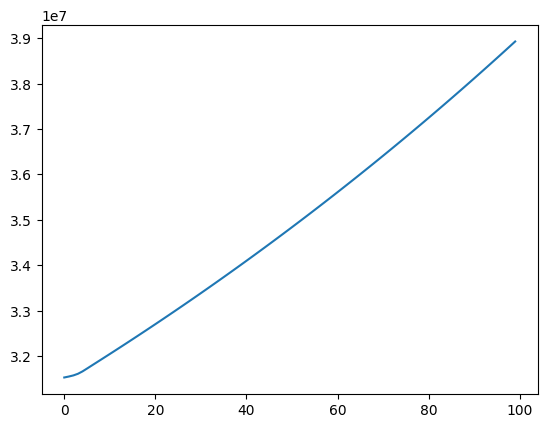

In [363]:
plt.plot(losses_mlp)
plt.show()

In [364]:
print(losses_mlp)
losses_mlp[-1]

[31527179.915822204, 31548079.214663558, 31572640.258907747, 31608493.176739797, 31660899.129094627, 31724068.410068378, 31788303.873868074, 31852214.807153296, 31916158.083301023, 31980271.71708234, 32044604.48198501, 32109176.454489455, 32173997.228930406, 32239072.06261713, 32304404.230532207, 32369996.027967926, 32435849.235287428, 32501965.348718442, 32568345.701637957, 32634991.531388447, 32701904.017582353, 32769084.304820303, 32836533.516564954, 32904252.76383164, 32972243.150754597, 33040505.77822229, 33109041.746293522, 33177852.15582811, 33246938.109603293, 33316300.713087656, 33385941.07498438, 33455860.307616826, 33526059.527205333, 33596539.85406828, 33667302.412769854, 33738348.332230166, 33809678.74580861, 33881294.7913679, 33953197.6113245, 34025388.35268904, 34097868.167099655, 34170638.21085015, 34243699.64491459, 34317053.63496913, 34390701.35141217, 34464643.96938307, 34538882.66878013, 34613418.63427799, 34688253.055344574, 34763387.12625801, 34838822.0461234, 349

38930003.05415364